# Linear Regression with Scikit Learn

### TASK-To predict the percentage of marks that a student is expected to score based upon the number of hours they studied

Linear Regression is a supervised machine learning algorithm where the predicted output is continuous and has a constant slope. It's used to predict values within a continuous range, rather than trying to classify them into categories.

## Importing Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Reading Data from Remote Link 

In [6]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully")

data.head()

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## Stastical Description of Data

In [7]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [8]:
data.shape

(25, 2)

## Ploting the data

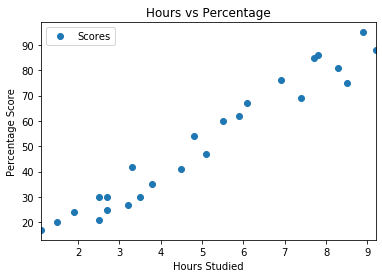

In [9]:
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

From the graph, we can see that there is a positive linear relation between the number of hours studied and percentage of score.

### Preparing the Data and splitting in Training -Testing data set

In [10]:
#Divide the data into attributes(inputs) X and label Y(outputs)
x= data.iloc[:, :-1].values
y= data.iloc[:, 1].values

Split data into traning and testing sets,using Scikit-Learn's built-in train_test_split() method:

In [11]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0) 

# Training the model

In [12]:
from sklearn.linear_model import LinearRegression
reg= LinearRegression()
reg.fit(x_train, y_train)
print("Training our algorithm is finished")

Training our algorithm is finished


#### Plotting the regression line


In [13]:
line = reg.coef_*x+reg.intercept_

##### Plotting for test data 

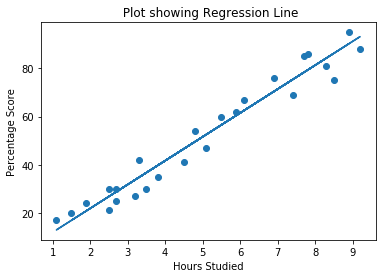

In [14]:
plt.scatter(x,y)
plt.plot(x, line);
plt.title(" Plot showing Regression Line")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Score")
plt.show()

## Making Predictons

In [15]:
#displaying the test data(in Hours)
print(x_test)
# Predicting the scores
Prediction= reg.predict(x_test) 


[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


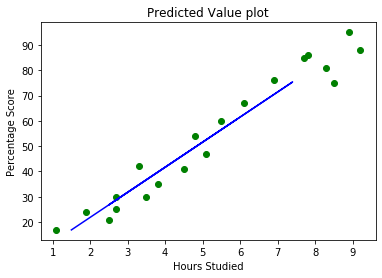

In [16]:
#Ploting Predicted value
plt.scatter(x_train,y_train, color= "green")
plt.plot(x_test,Prediction, color= "blue")
plt.title("Predicted Value plot")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Score")
plt.show()

## Comparison between Actual and Predicted Value

In [17]:
df=pd.DataFrame({'Actual': y_test, 'Predicted': Prediction})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


####  Using Bar Graph comparison between Actual and Predicted Value 

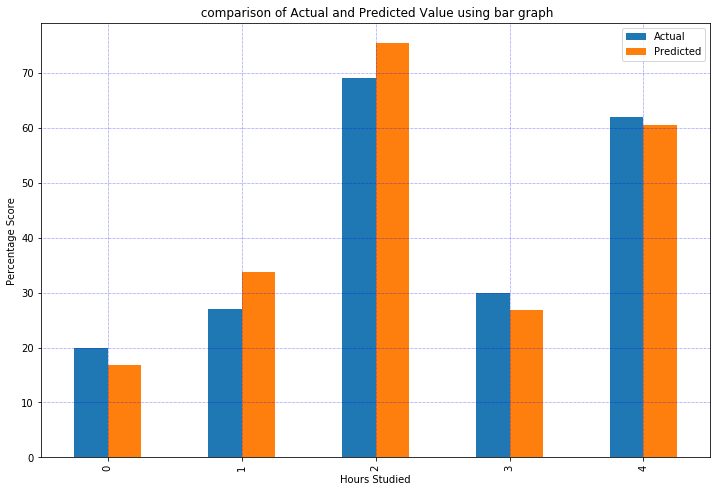

In [18]:
df.plot(kind='bar',figsize=(12,8))
plt.title(' comparison of Actual and Predicted Value using bar graph')
plt.grid(which='major',linestyle=':',linewidth='0.5',color='blue')
plt.grid(which='minor',linestyle=':',linewidth='0.5',color='red')
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Score")
plt.show()

## Predicting score of student using given data

In [19]:
Prediction_score=reg.predict([[9.25]])
print("predicted score for student studying 9.25 hrs is:", Prediction_score)

predicted score for student studying 9.25 hrs is: [93.69173249]


## Performance of model

This step is particularly important to compare how well different algorithms perform on a particular dataset. Here, we have chosen the mean square error. 

In [20]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, Prediction)) 

Mean Absolute Error: 4.183859899002975
